# Stock Price Data Cleanup Demo

This notebook shows the basic steps to begin to use downloaded NASDAQ csv stock price data.

*Follow the links below to download the csv and save it in the same directory as this notebook.*

The steps are:
1. Reading the data from the csv file into a pandas dataframe.
2. Cleaning up the data.
3. Plotting the data.


Data Source: [NASDAQ](https://www.nasdaq.com/), [Historical Quotes](https://www.nasdaq.com/market-activity/stocks/pep/historical)

## Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Read data from csv

In [2]:
# Ingest the csv file into a pandas dataframe.
df = pd.read_csv('HistoricalQuotes-PEP-1M.csv')
# For this to work, the csv file must be in the same directory as this notebook.
print(df.head(3)) # look at the first 3 rows

         Date  Close/Last    Volume      Open      High       Low
0  05/29/2020     $131.55  13338800   $132.01   $132.24   $130.32
1  05/28/2020     $132.29   4976408   $131.21   $132.73   $130.11
2  05/27/2020     $130.81   5686547   $129.72   $130.84   $128.58


In [3]:
print(df.columns) # find out the names of the columns.
# Note that some of these column titles have whitespace before the name.
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print (df.dtypes) # check what type of data it contains

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object


In [4]:
print(df[' Close/Last'][0:3])

0     $131.55
1     $132.29
2     $130.81
Name:  Close/Last, dtype: object


The above printout shows us that the price data is not yet ready to use for plotting. It contains the dollar sign "$" and has dtype object instead of float.

## Data Cleanup

In [5]:
# Remove dollar signs using df.replace()
columns_with_dollars = [' Close/Last', ' Open', ' High', ' Low']
df[columns_with_dollars] = df[columns_with_dollars].replace({'\$':''}, regex=True)
print(df[' Close/Last'][0:3])

0     131.55
1     132.29
2     130.81
Name:  Close/Last, dtype: object


In [6]:
# Convert object datatype to float
df[columns_with_dollars] = df[columns_with_dollars].astype(float)
print(df[' Close/Last'][0:3])

0    131.55
1    132.29
2    130.81
Name:  Close/Last, dtype: float64


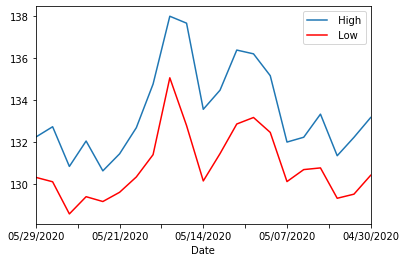

In [7]:
# Test plot the data.
ax = plt.gca() # gca stands for 'get current axis'

df.plot(kind='line',x='Date',y=' High',ax=ax)
df.plot(kind='line',x='Date',y=' Low', color='red', ax=ax)

plt.show()

The above plot is correct, however we want to reverse the order of the data to begin with the oldest date and end with the newest date.

In [8]:
# Reverse the spreadsheet to begin with oldest date and end with newest date.
df = df[::-1] # This reverses the order, but doesn't change the index numbers.
df = df.reset_index(drop=True) # This overwrites the index numbers to start from zero.


## Final Results Plot

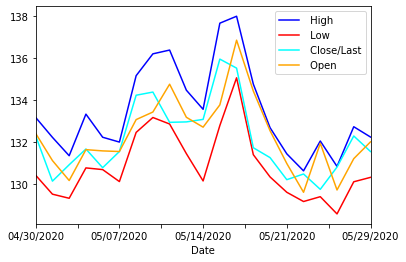

In [9]:
# Plot the data.
ax = plt.gca() # gca stands for 'get current axis'

df.plot(kind='line',x='Date',y=' High', color='blue',ax=ax)
df.plot(kind='line',x='Date',y=' Low', color='red', ax=ax)
df.plot(kind='line',x='Date',y=' Close/Last', color='cyan',ax=ax)
df.plot(kind='line',x='Date',y=' Open', color='orange', ax=ax)

plt.show()